In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
path = 'heart.csv'
df = pd.read_csv(path)
df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart Disease
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,1
299,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1
300,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,2
301,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,2


In [3]:
df.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart Disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,1.531353
std,87.612784,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,1.436806
min,0.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,151.000000,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,1.000000
75%,226.500000,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,2.000000
max,302.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,4.000000


In [4]:
X = df.drop("target",1)
Y = df["target"]

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
cor = df.corr()

In [6]:
#Correlation with output variable
cor_target = abs(cor["target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

Unnamed: 0       0.862585
age              0.225439
sex              0.280937
cp               0.433798
thalach          0.421741
exang            0.436757
oldpeak          0.430696
slope            0.345877
ca               0.391724
thal             0.344029
target           1.000000
Heart Disease    0.237127
Name: target, dtype: float64

In [7]:
df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart Disease
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,1
299,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1
300,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,2
301,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,2


In [8]:
X_new = df[["trestbps", "chol", "thal", "thalach"]]
featureset = X_new

from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
X_new = feature_mtx
X_new


array([[0.48113208, 0.24429224, 0.33333333, 0.60305344],
       [0.33962264, 0.28310502, 0.66666667, 0.88549618],
       [0.33962264, 0.17808219, 0.66666667, 0.77099237],
       ...,
       [0.47169811, 0.15296804, 1.        , 0.53435115],
       [0.33962264, 0.01141553, 1.        , 0.33587786],
       [0.33962264, 0.25114155, 0.66666667, 0.78625954]])

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, max_iter=100000)
kmeans
kModel = kmeans.fit(X_new)


In [10]:
pd.crosstab(Y, kModel.labels_)

col_0,0,1
target,,
0,89,49
1,28,137


In [11]:
(89+137)/(89+137+49+28)

0.7458745874587459

# decision tree 

In [12]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn import tree


In [13]:
import matplotlib.pyplot as plt

In [14]:
X = df.cp
Y = df.target
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [15]:
labels = df.target

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
obj = DecisionTreeClassifier()


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(df, X)


In [20]:
obj = obj.fit(x_train,y_train)

[Text(930.0, 951.3000000000001, 'X[3] <= 0.5\ngini = 0.657\nsamples = 227\nvalue = [110, 40, 61, 16]'),
 Text(465.0, 679.5, 'gini = 0.0\nsamples = 110\nvalue = [110, 0, 0, 0]'),
 Text(1395.0, 679.5, 'X[3] <= 1.5\ngini = 0.593\nsamples = 117\nvalue = [0, 40, 61, 16]'),
 Text(930.0, 407.70000000000005, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0, 0]'),
 Text(1860.0, 407.70000000000005, 'X[3] <= 2.5\ngini = 0.329\nsamples = 77\nvalue = [0, 0, 61, 16]'),
 Text(1395.0, 135.89999999999998, 'gini = 0.0\nsamples = 61\nvalue = [0, 0, 61, 0]'),
 Text(2325.0, 135.89999999999998, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 0, 16]')]

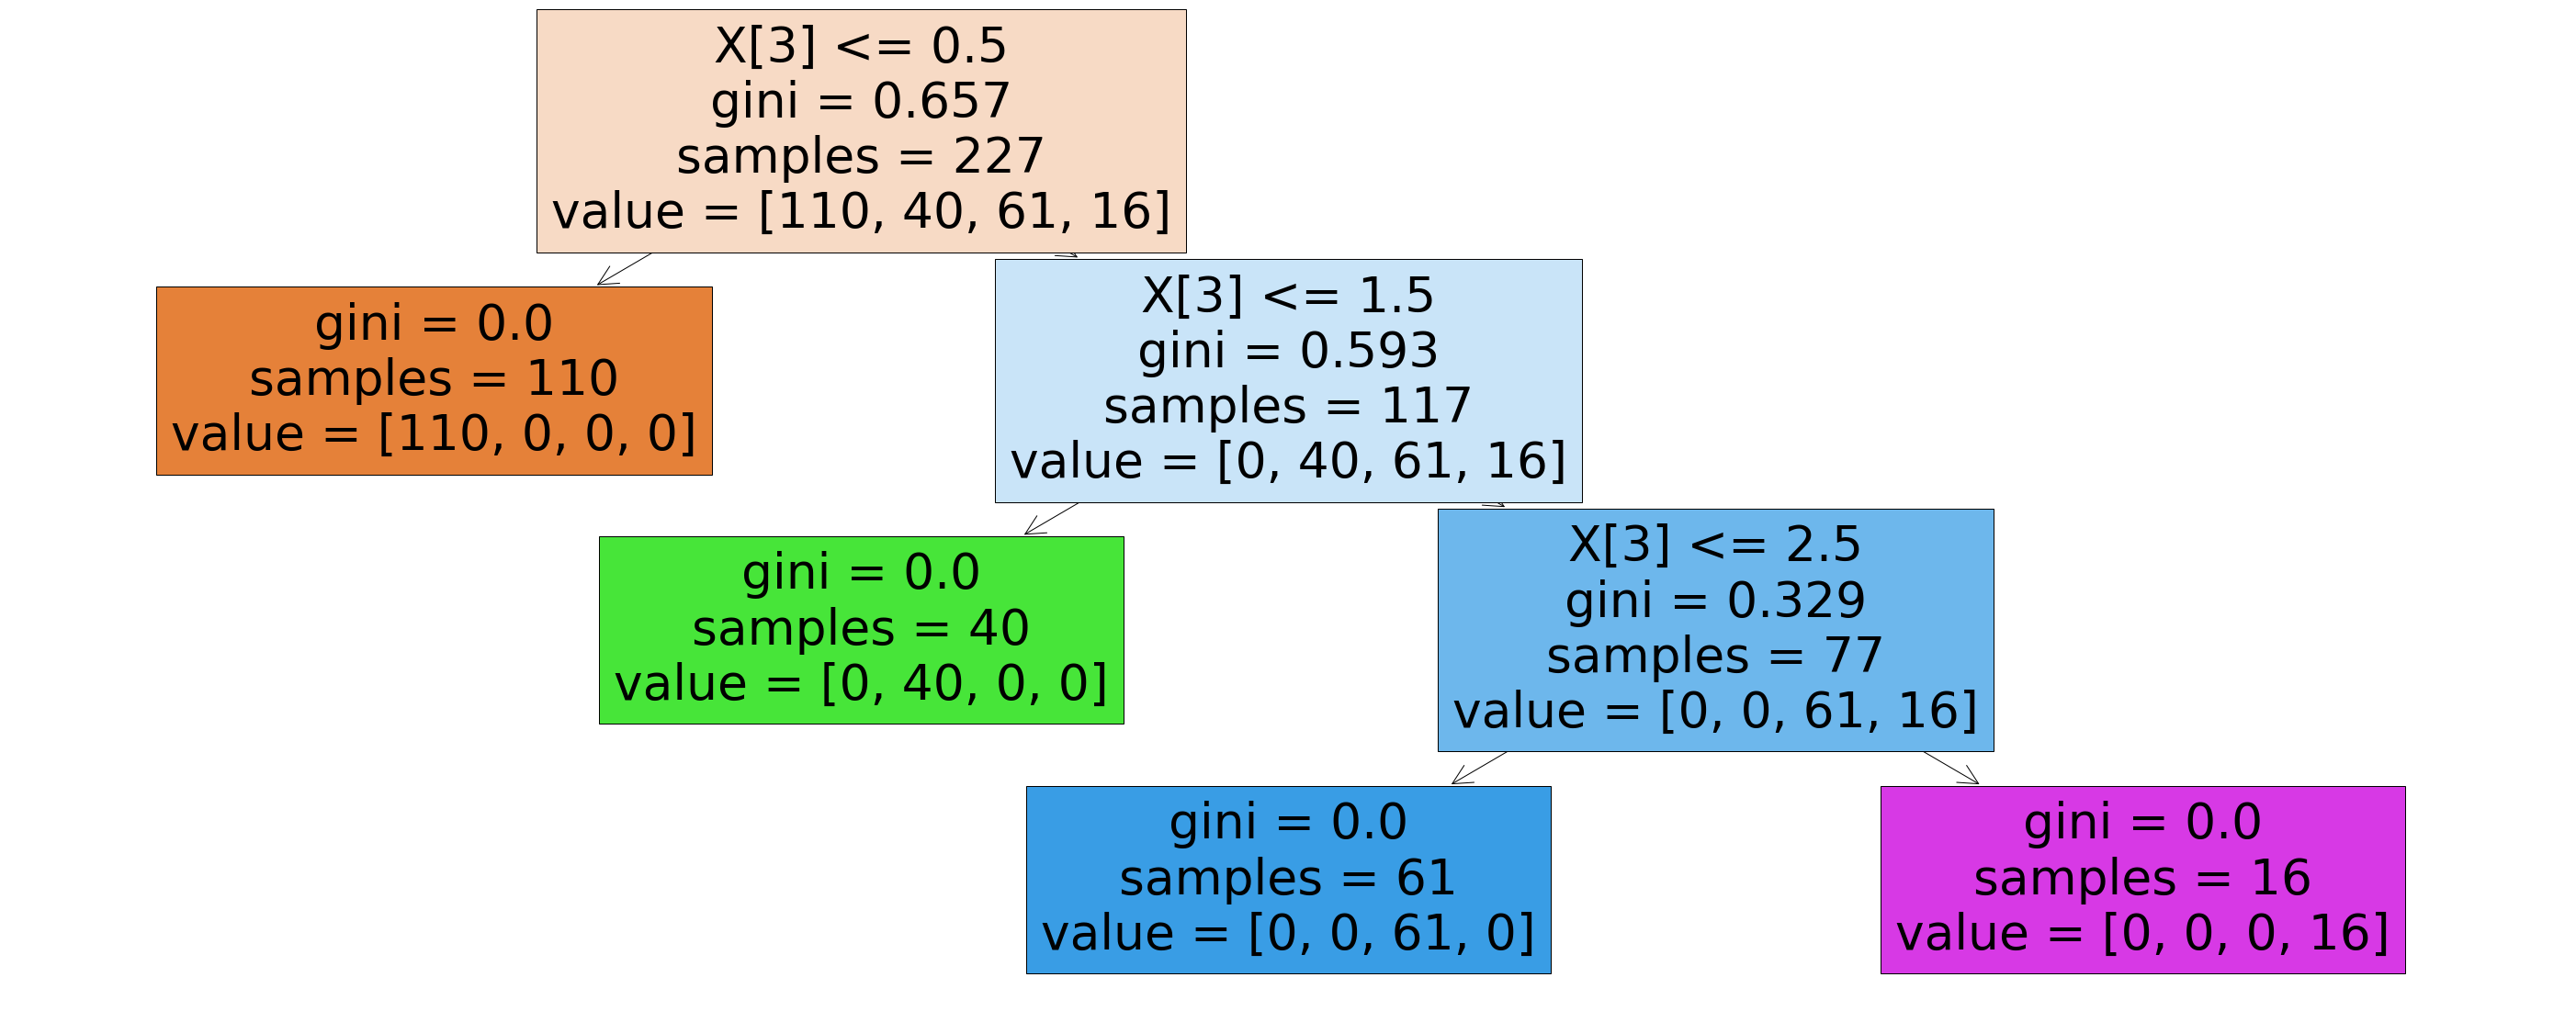

In [21]:
plt.figure(figsize = (50,20))
tree.plot_tree(obj, filled = True)

In [22]:
yhat = obj.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test,yhat)

1.0

# knn 

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242,) (242,)
Test set: (61,) (61,)


In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

ValueError: Expected 2D array, got 1D array instead:
array=[3 2 2 0 1 0 2 0 0 0 0 2 2 0 0 0 1 3 3 1 2 2 2 0 2 1 0 0 0 1 0 0 2 0 2 1 0
 1 3 2 2 2 0 0 0 2 2 2 0 0 2 0 1 2 0 0 1 2 2 1 0 2 2 1 2 0 3 0 1 0 0 2 0 0
 0 0 1 2 2 3 0 0 2 2 2 2 0 3 1 0 2 0 0 2 1 1 2 2 0 2 0 1 0 0 2 0 0 0 1 0 1
 2 2 0 0 0 0 2 2 1 0 0 2 0 0 0 0 0 1 0 0 0 2 0 0 0 2 2 2 1 2 0 2 3 0 1 1 0
 0 0 0 0 1 0 0 0 2 2 0 2 1 0 2 0 3 1 0 1 1 0 3 2 1 0 1 0 2 0 0 0 0 2 2 0 2
 0 1 0 0 2 3 0 0 0 0 0 0 3 0 0 3 1 0 0 0 0 0 2 1 2 0 0 2 0 1 0 1 0 0 0 2 1
 0 2 0 0 2 2 2 3 2 0 2 2 1 0 0 3 1 0 0 2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [349]:
yhat = neigh.predict(X_test)
yhat

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [351]:

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8016528925619835
Test set Accuracy:  0.5901639344262295


In [359]:
cnf_matrix = confusion_matrix(y_test,yhat)


In [360]:
cnf_matrix

array([[10, 15],
       [10, 26]], dtype=int64)

In [356]:
(10+26)/(10+15+10+26)

0.5901639344262295

# Logistic

In [267]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [269]:
df = pd.read_csv("heart2.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart Disease
0,0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4
3,3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


In [271]:
X = np.asarray(churn_df[['sex', 'age', 'fbs', 'oldpeak', 'target', 'chol', 'cp']])
X[0:5]

array([[  1. ,  63. ,   1. ,   2.3,   1. , 233. ,   3. ],
       [  1. ,  37. ,   0. ,   3.5,   1. , 250. ,   2. ],
       [  0. ,  41. ,   0. ,   1.4,   1. , 204. ,   1. ],
       [  1. ,  56. ,   0. ,   0.8,   1. , 236. ,   1. ],
       [  0. ,  57. ,   0. ,   0.6,   1. , 354. ,   0. ]])

In [272]:
y = np.asarray(df['Heart Disease'])
y [0:5]

array([1, 1, 4, 1, 0], dtype=int64)

In [273]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 7) (242,)
Test set: (61, 7) (61,)


In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(max_iter = 500).fit(X_train,y_train)
LR

C:\Users\Novilendra Singh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Novilendra Singh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [275]:
yhat = LR.predict(X_test)
yhat

array([4, 1, 1, 4, 0, 0, 2, 4, 4, 4, 4, 1, 0, 0, 4, 0, 1, 0, 0, 1, 4, 4,
       2, 4, 1, 2, 0, 1, 4, 0, 0, 1, 1, 0, 0, 4, 1, 1, 0, 2, 0, 0, 1, 0,
       4, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 4, 4, 1, 2, 0, 0], dtype=int64)

In [276]:
yhat_prob = LR.predict(X_test)
yhat_prob

array([4, 1, 1, 4, 0, 0, 2, 4, 4, 4, 4, 1, 0, 0, 4, 0, 1, 0, 0, 1, 4, 4,
       2, 4, 1, 2, 0, 1, 4, 0, 0, 1, 1, 0, 0, 4, 1, 1, 0, 2, 0, 0, 1, 0,
       4, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 4, 4, 1, 2, 0, 0], dtype=int64)

In [277]:
from sklearn.metrics import confusion_matrix

In [278]:
cnf_matrix = confusion_matrix(y_test,yhat)


In [279]:
cnf_matrix

array([[14,  2,  0,  0,  0],
       [ 6, 14,  0,  0,  1],
       [ 0,  1,  7,  0,  2],
       [ 1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 12]], dtype=int64)

In [280]:
(14+14+7+12)/(14+14+7+12+2+6+1+1+2+1+1)

0.7704918032786885

# SVM

In [281]:
df.head()

,Unnamed: 0,Unnamed: 0.1,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart Disease
0,0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4
3,3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


In [288]:
df = df[['sex', 'age', 'fbs', 'oldpeak', 'target', 'chol', 'cp']]
df['target'] =df['target'].astype('int')
df.head()

,sex,age,fbs,oldpeak,target,chol,cp
0,1,63,1,2.3,1,233,3
1,1,37,0,3.5,1,250,2
2,0,41,0,1.4,1,204,1
3,1,56,0,0.8,1,236,1
4,0,57,0,0.6,1,354,0


In [320]:
x=df[['sex', 'age', 'fbs', 'oldpeak', 'target', 'chol', 'cp']]

In [321]:
x

,sex,age,fbs,oldpeak,target,chol,cp
0,1,63,1,2.3,1,233,3
1,1,37,0,3.5,1,250,2
2,0,41,0,1.4,1,204,1
3,1,56,0,0.8,1,236,1
4,0,57,0,0.6,1,354,0
...,...,...,...,...,...,...,...
298,0,57,0,0.2,0,241,0
299,1,45,0,1.2,0,264,3
300,1,68,1,3.4,0,193,0
301,1,57,0,1.2,0,131,0


In [335]:
y =df['fbs']

In [336]:
y

0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: fbs, Length: 303, dtype: int64

In [337]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_test, y_train, y_test


(     sex  age  fbs  oldpeak  target  chol  cp
 226    1   62    0      1.4       0   281   1
 93     0   54    1      0.0       1   288   1
 286    1   59    0      0.8       0   204   3
 137    1   62    1      0.0       1   208   1
 265    1   66    0      0.1       0   212   0
 ..   ...  ...  ...      ...     ...   ...  ..
 37     1   54    0      1.6       1   232   2
 2      0   41    0      1.4       1   204   1
 237    1   60    0      1.2       0   293   0
 99     1   53    1      0.0       1   246   2
 123    0   54    0      0.0       1   267   2
 
 [242 rows x 7 columns],      sex  age  fbs  oldpeak  target  chol  cp
 74     0   43    0      0.2       1   213   2
 96     0   62    0      1.2       1   394   0
 17     0   66    0      2.6       1   226   3
 212    1   39    0      1.2       0   219   0
 288    1   57    0      3.0       0   335   0
 ..   ...  ...  ...      ...     ...   ...  ..
 117    1   56    0      1.9       1   193   3
 35     0   46    0      1.4      

In [338]:
from sklearn.svm import SVC

In [339]:
clf = SVC(kernel='rbf').fit(x_train, y_train)

C:\Users\Novilendra Singh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [340]:
y_hat = clf.predict(x_test)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [341]:
from sklearn.metrics import confusion_matrix
cnf = confusion_matrix(y_hat, y_test)
cnf

array([[52,  8],
       [ 1,  0]], dtype=int64)

In [342]:
cnf[0][0]+cnf[1][1]

52

In [343]:
(52+0)/(52+8+1+0)

0.8524590163934426